**<파일 경로>**
- C:/Users/Brian/Desktop/Data Science/Projects/Playdata/dataset/made_by_전처리

In [1]:
filepath = input()

C:/Users/Brian/Desktop/Data Science/Projects/Playdata/dataset/made_by_전처리


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# seaborn 폰트 및 스타일 설정
sns.set(font = "Malgun Gothic", rc = {"axes.unicode_minus": False}, style = 'whitegrid')
# Pandas 출력 결과 부동소수점 설정
pd.options.display.float_format = '{:.1f}'.format

- 먼저 메모리 절약을 위해 각 변수들의 데이터 타입을 지정해 준 뒤, 각 데이터 셋을 불러오도록 하겠다.

In [3]:
df_dtype = {
    # 지하철 데이터 관련 변수들 데이터 타입 지정
    'boarding_num': np.int32, 'platform_area': np.float32, 
    'length': np.float32, 'transfer_num': np.float32, 'entrance': np.float32, 
    'msi_cnt': np.float32, 'hsi_cnt': np.float32, 'uvi_cnt': np.float32, 
    'hpi_cnt': np.float32, 'mti_cnt': np.float32, 'day': np.int32,
    # 인구 데이터 관련 변수들 데이터 타입 지정
    'pop_below_20': np.float32, 'pop_20_30_40': np.float32, 'pop_over_50': np.float32,
    # 기상 데이터 관련 변수들 데이터 타입 변경
    'temp': np.float32, 'windspeed': np.float32, 'rain': np.float32,
    # 예측 값 데이터 타입 변경
    'xgb_pred': np.int32, 'lgbm_pred': np.int32
}

df_pred = pd.read_csv('{}/예측 결과 시각화용_부스팅 모델.csv'.format(filepath), dtype = df_dtype)
df_pred.head()

,date,line,station_name,boarding_num,platform_area,length,transfer_num,entrance,msi_cnt,hsi_cnt,...,time_심야,time_오전,time_오후,time_저녁,season_autumn,season_spring,season_summer,season_winter,xgb_pred,lgbm_pred
0,2020-01-01,2호선,시청,0,3553.0,205.0,2.0,5.0,1.0,2.0,...,1,0,0,0,0,0,0,1,70,0
1,2020-01-01,2호선,시청,8,3553.0,205.0,2.0,5.0,1.0,2.0,...,1,0,0,0,0,0,0,1,24,10
2,2020-01-01,2호선,시청,45,3553.0,205.0,2.0,5.0,1.0,2.0,...,1,0,0,0,0,0,0,1,142,135
3,2020-01-01,2호선,시청,32,3553.0,205.0,2.0,5.0,1.0,2.0,...,1,0,0,0,0,0,0,1,2,0
4,2020-01-01,2호선,시청,73,3553.0,205.0,2.0,5.0,1.0,2.0,...,1,0,0,0,0,0,0,1,344,291


- 추가적인 메모리 절약을 위해 line과 station_name 변수의 타입을 category로 변환하고, 원-핫 인코딩 처리된 변수들의 dtype을 모두 uint8로 지정해주겠다.

In [4]:
cat_vars = ['line', 'station_name']

for var in tqdm(cat_vars):
    df_pred[var] = df_pred[var].astype('category')

In [5]:
# One-Hot Encoding 처리된 변수들의 데이터 타입 변경
df_pred[df_pred.columns[21:-2]] = df_pred.iloc[:, 21:-2].astype('uint8')

In [6]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364000 entries, 0 to 363999
Columns: 121 entries, date to lgbm_pred
dtypes: category(2), float32(15), int32(4), int64(1), object(1), uint8(98)
memory usage: 66.7+ MB


In [7]:
df_pred.columns.tolist()

['date',
 'line',
 'station_name',
 'boarding_num',
 'platform_area',
 'length',
 'transfer_num',
 'entrance',
 'msi_cnt',
 'hsi_cnt',
 'uvi_cnt',
 'hpi_cnt',
 'mti_cnt',
 'temp',
 'windspeed',
 'rain',
 'pop_below_20',
 'day',
 'pop_20_30_40',
 'pop_over_50',
 'boarding_승차',
 'boarding_하차',
 'gu_강남구',
 'gu_강동구',
 'gu_강북구',
 'gu_강서구',
 'gu_관악구',
 'gu_광진구',
 'gu_구로구',
 'gu_금천구',
 'gu_노원구',
 'gu_도봉구',
 'gu_동대문구',
 'gu_동작구',
 'gu_마포구',
 'gu_서대문구',
 'gu_서초구',
 'gu_성동구',
 'gu_성북구',
 'gu_송파구',
 'gu_양천구',
 'gu_영등포구',
 'gu_용산구',
 'gu_은평구',
 'gu_종로구',
 'gu_중구',
 'gu_중랑구',
 'type_복합식',
 'type_상대식',
 'type_섬식',
 'floor_1F',
 'floor_1FB2',
 'floor_1FB3',
 'floor_1FB5',
 'floor_2F',
 'floor_2FB2',
 'floor_2FB3',
 'floor_3F',
 'floor_4F',
 'floor_5FB2',
 'floor_B1',
 'floor_B2',
 'floor_B3',
 'floor_B4',
 'floor_B5',
 'floor_B6',
 'floor_B8',
 'year_2018',
 'year_2019',
 'year_2020',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_1

# 최종 예측 결과 시각화에 필요한 전처리 작업 수행

## hour 변수 재생성
- Feature engineering 과정에서 hour 변수를 원-핫 인코딩 처리했기 때문에 기존의 hour 변수가 제거되었다.
- 따라서 우선 기존의 hour 변수를 재생성한 뒤에 최종 예측 결과를 시각화 해주도록 하겠다.

In [8]:
def make_org_hour(df):
    hours = ['hour_0', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 
             'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
             'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
             'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']
    
    df['hour'] = 0
    for hour in tqdm(hours):
        for i in range(len(df)):
            if df[hour][i] == 1:
                num = int(hour.split('_')[1])
                df['hour'][i] = num
                
    df.hour.value_counts()

In [9]:
make_org_hour(df_pred)

<ipython-input-8-f73e36492cdd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'][i] = num


## 시각화 범위 설정
- 시각화는 2020년 6월 첫 번째 주의 예측 값들을 대상으로 할 것이므로, 이에 맞는 데이터만 추출해주겠다.
    - 즉, 2020년 6월 1일 ~ 2020년 6월 7일의 데이터만 추출!

In [10]:
df_pred['date'] = pd.to_datetime(df_pred['date'])

cond1 = (df_pred['month_6'] == 1)
cond2 = (df_pred['date'].between('2020-06-01', '2020-06-07'))

df_month_6 = df_pred[cond1 & cond2]
df_month_6.shape

(14000, 122)

In [11]:
# datetime으로 변경해 준 date 변수를 다시 str 타입으로 변경
df_month_6['date'] = df_month_6['date'].astype(str)

<ipython-input-11-c9b70107a498>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month_6['date'] = df_month_6['date'].astype(str)


## 시각화에 필요한 변수들만 추출

In [12]:
df_month_6 = df_month_6[['date', 'hour', 'station_name', 
                         'boarding_승차', 'boarding_하차', 
                         'boarding_num', 'xgb_pred']]
df_month_6

,date,hour,station_name,boarding_승차,boarding_하차,boarding_num,xgb_pred
6080,2020-06-01,0,시청,1,0,0,0
6081,2020-06-01,0,시청,0,1,0,1
6082,2020-06-01,5,시청,1,0,35,71
6083,2020-06-01,5,시청,0,1,62,7
6084,2020-06-01,6,시청,1,0,71,414
...,...,...,...,...,...,...,...
363075,2020-06-07,21,용두(동대문구청),0,1,65,0
363076,2020-06-07,22,용두(동대문구청),1,0,25,0
363077,2020-06-07,22,용두(동대문구청),0,1,53,0
363078,2020-06-07,23,용두(동대문구청),1,0,13,0


## 시각화에 사용할 지하철 역 선정
- 2호선 지하철 역에 대한 모든 예측 결과를 시각화하는 것은 무리가 있다.
- 따라서 아래와 같이 총 5개의 지하철 역에 대해서만 시각화를 진행해보도록 하겠다.
    1. 시청
    2. 왕십리(성동구청)
    3. 건대입구
    4. 잠실(송파구청)
    5. 강남

In [13]:
df_cityhall = df_month_6[df_month_6['station_name'] == '시청']
df_wangsimni = df_month_6[df_month_6['station_name'] == '왕십리(성동구청)']
df_konkuk = df_month_6[df_month_6['station_name'] == '건대입구']
df_jamsil = df_month_6[df_month_6['station_name'] == '잠실(송파구청)']
df_gangnam = df_month_6[df_month_6['station_name'] == '강남']

In [14]:
print(df_cityhall.shape, df_wangsimni.shape, 
      df_konkuk.shape, df_jamsil.shape, df_gangnam.shape)

(280, 7) (280, 7) (280, 7) (280, 7) (280, 7)


# 최종 예측 결과 시각화
- 예측 성능이 가장 뛰어났던 최종 모델 XGBoost의 예측 값들에 대하여, 한 눈에 보기 쉽게 시각화 작업을 수행해주겠다.

In [15]:
def draw_pointplot(df, day, station_name):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
    
    # 사용할 데이터 셋 조건 설정
    cond_승차 = (df['boarding_승차'] == 1)
    cond_하차 = (df['boarding_하차'] == 1)
    cond_day = (df['date'].str.contains(day))
    
    # 승차 인원 수 plot 그리기
    sns.pointplot(x = 'hour', y = 'boarding_num', color = 'blue',
                  data = df[cond_승차 & cond_day], ax = ax1)
    sns.pointplot(x = 'hour', y = 'xgb_pred', color = 'red',
                  data = df[cond_승차 & cond_day], ax = ax1)
    
    # 하차 인원 수 plot 그리기
    sns.pointplot(x = 'hour', y = 'boarding_num', color = 'blue',
                  data = df[cond_하차 & cond_day], ax = ax2)
    sns.pointplot(x = 'hour', y = 'xgb_pred', color = 'red',
                  data = df[cond_하차 & cond_day], ax = ax2)

    # title 설정
    ax1.set_title('{} {}역 승차 인원 수'.format(day, station_name), 
                  fontsize = 22)
    ax2.set_title('{} {}역 하차 인원 수'.format(day, station_name), 
                  fontsize = 22)

    # xlabel, ylabel 설정
    ax1.set_xlabel('Hour', fontsize = 20)
    ax1.set_ylabel('Number of Passengers(승차)', fontsize = 20)
    ax2.set_xlabel('Hour', fontsize = 20)
    ax2.set_ylabel('Number of Passengers(하차)', fontsize = 20)

    # tick 설정
    ax1.tick_params(labelsize = 15)
    ax2.tick_params(labelsize = 15)

    plt.show()

In [16]:
day_list = ['2020-06-01', '2020-06-02', '2020-06-03',
            '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07']

## 시청역

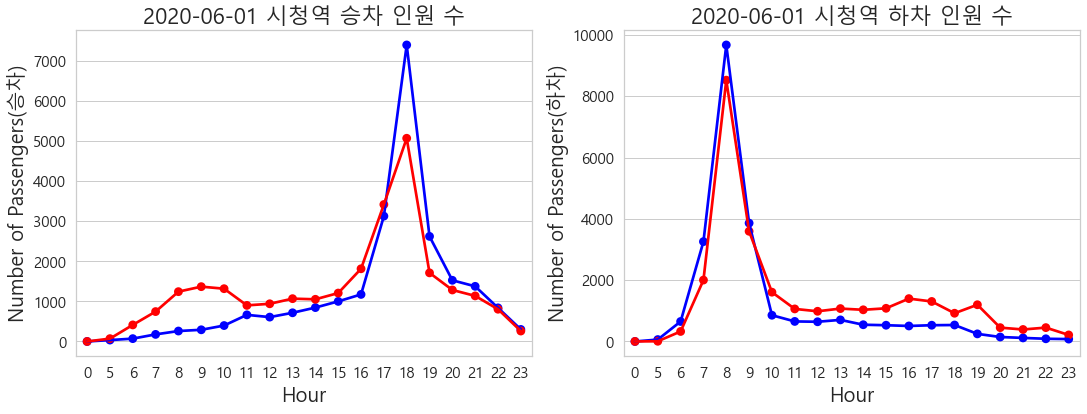

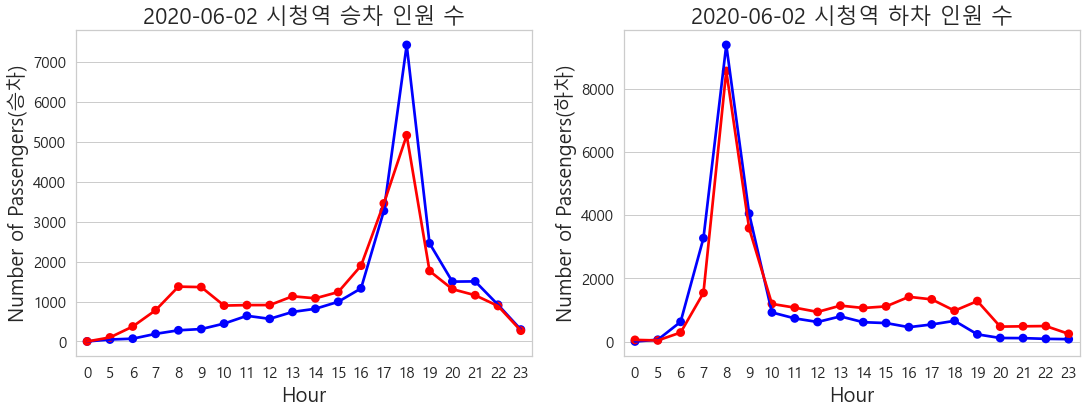

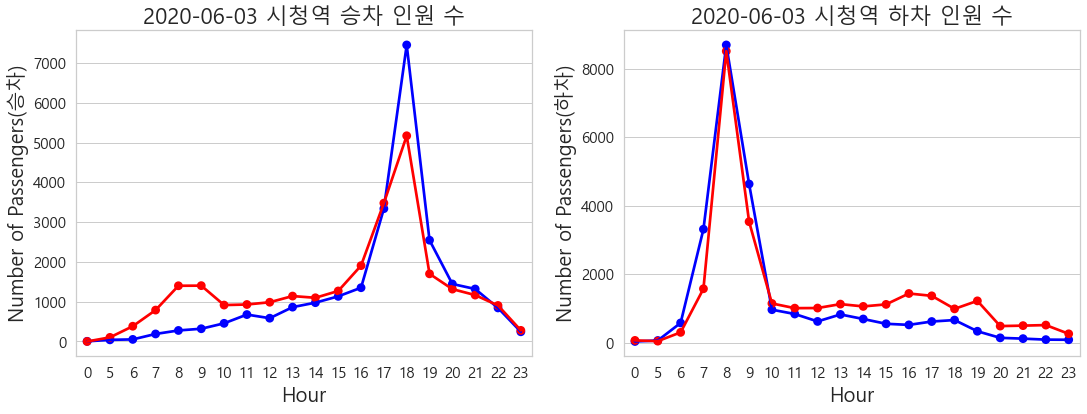

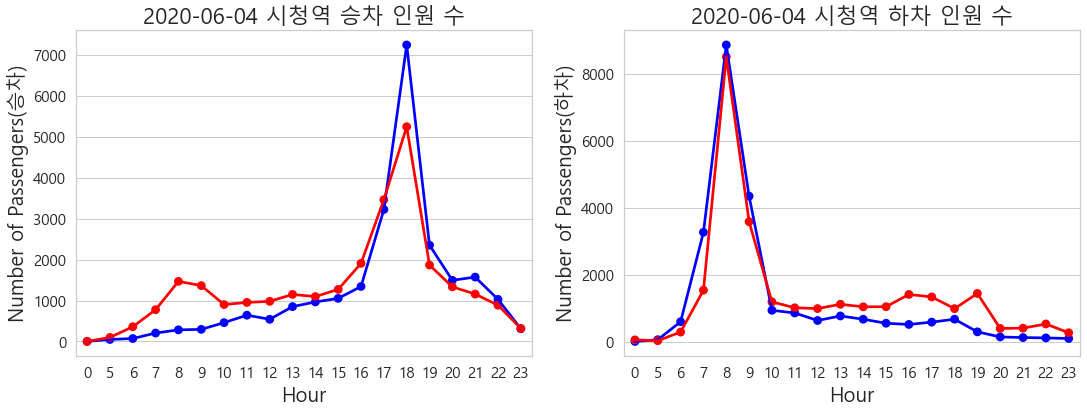

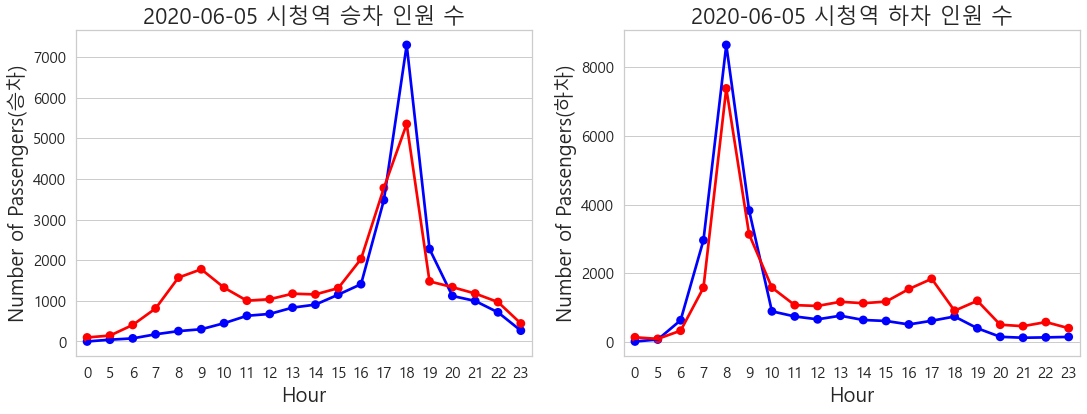

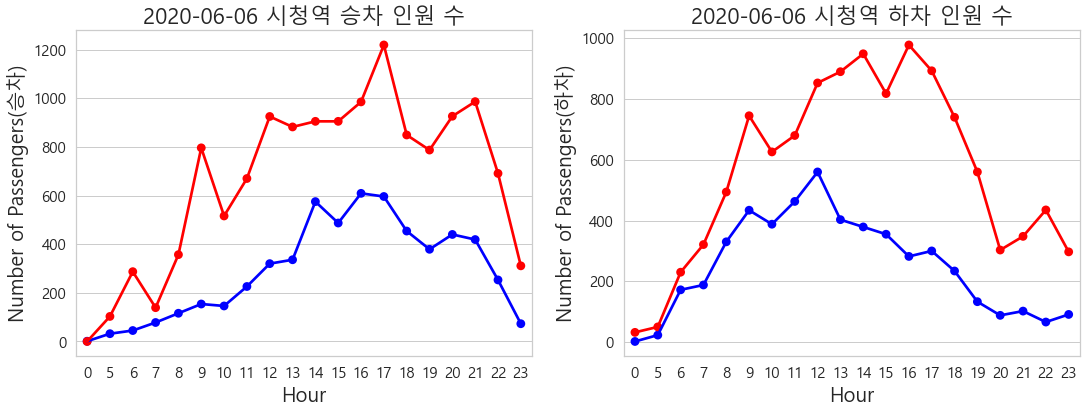

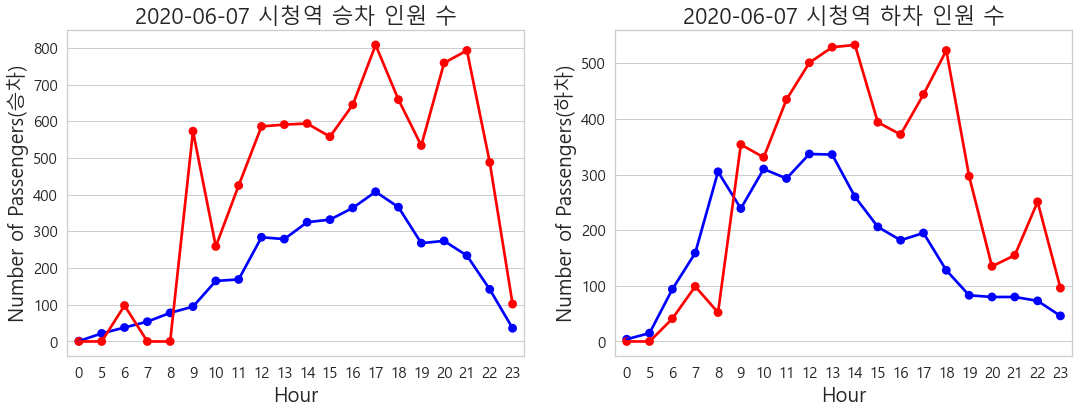

In [17]:
for day in tqdm(day_list):
    draw_pointplot(df_cityhall, day, '시청')

## 왕십리(성동구청)역

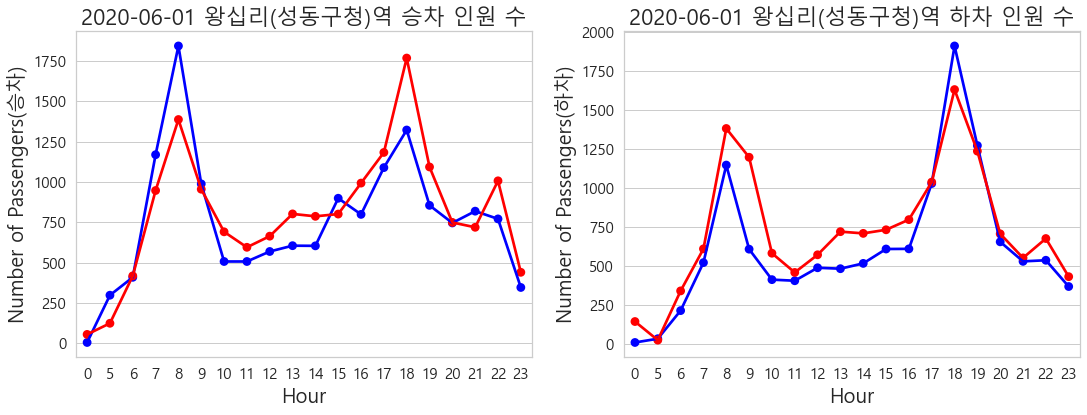

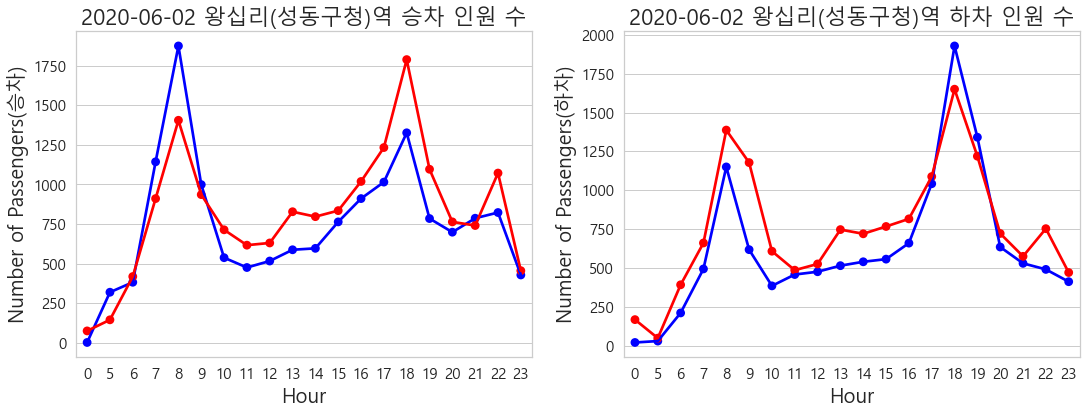

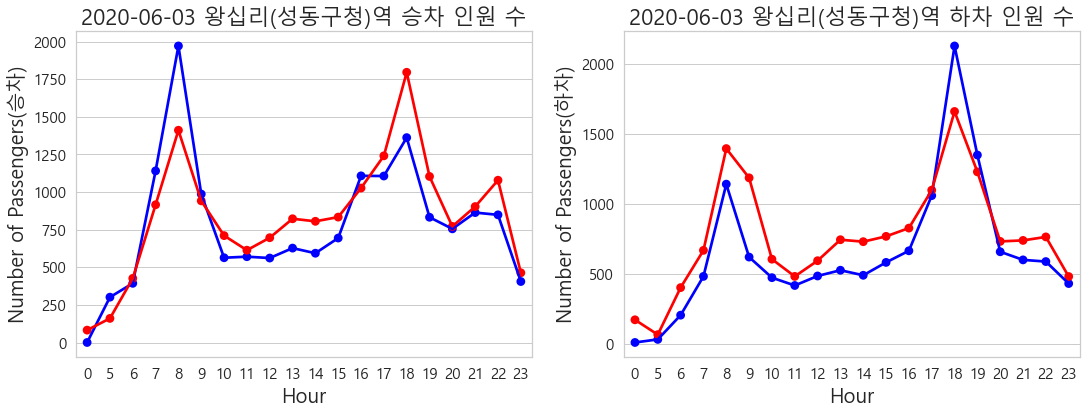

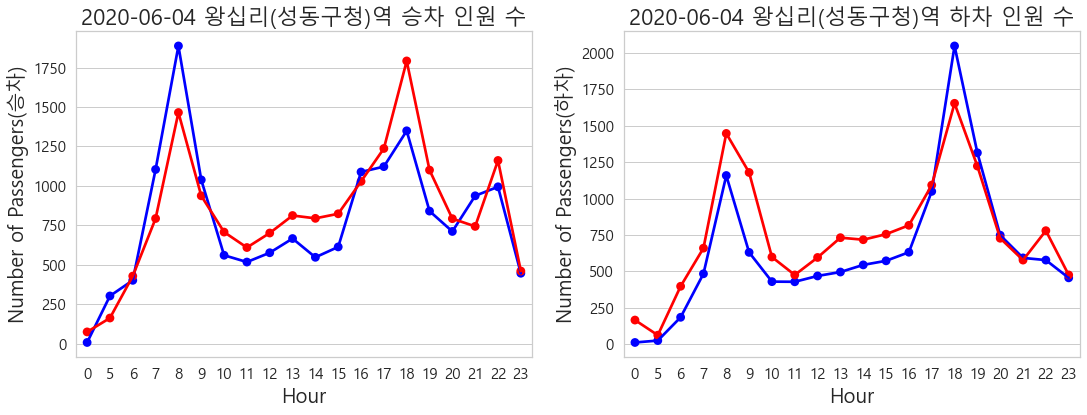

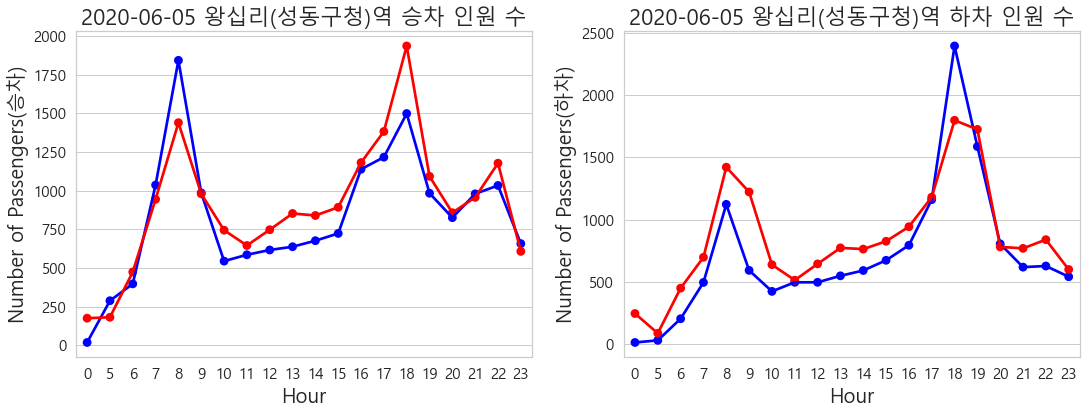

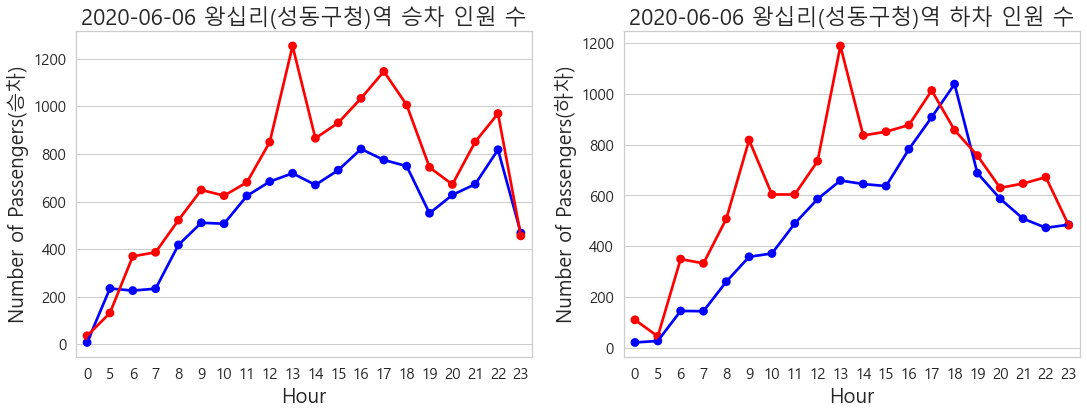

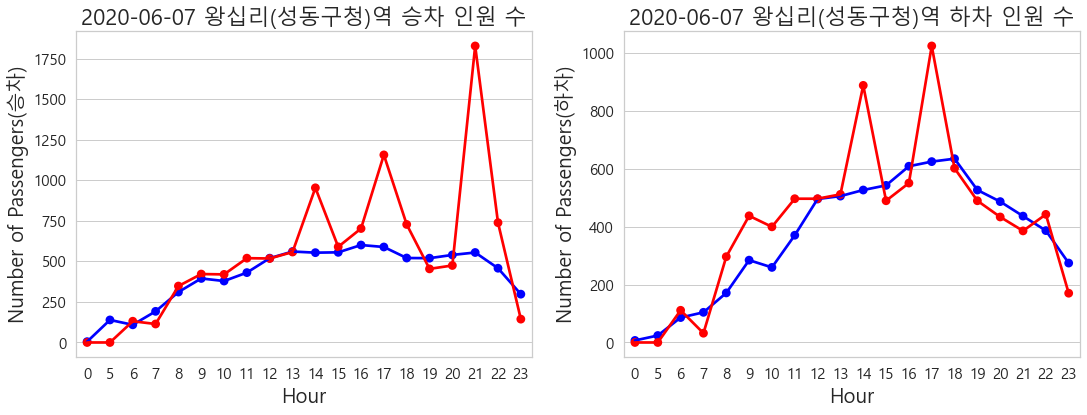

In [18]:
for day in tqdm(day_list):
    draw_pointplot(df_wangsimni, day, '왕십리(성동구청)')

## 건대입구역

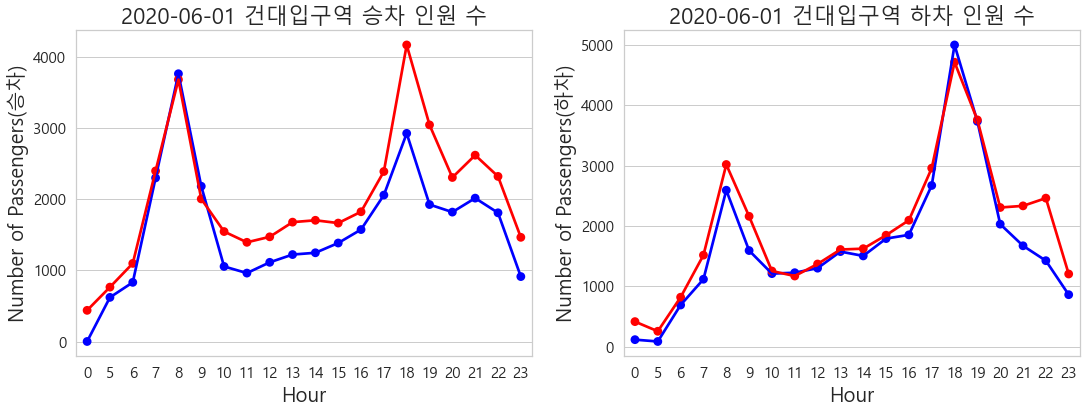

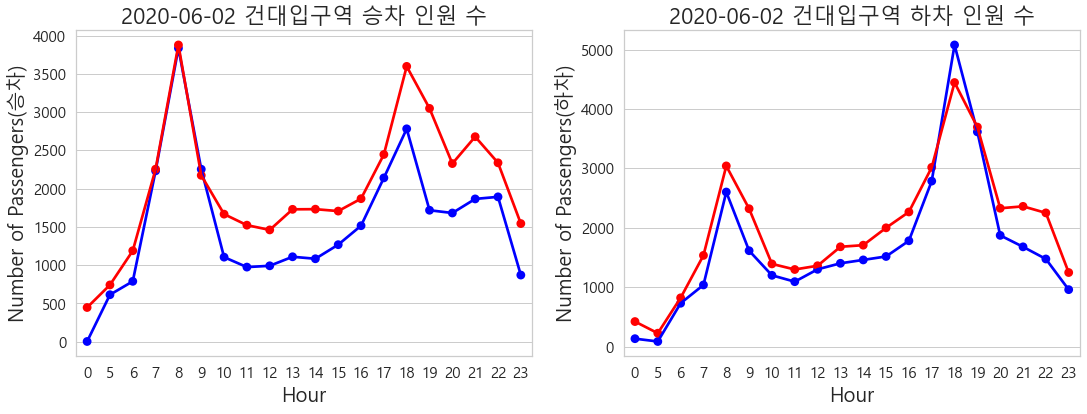

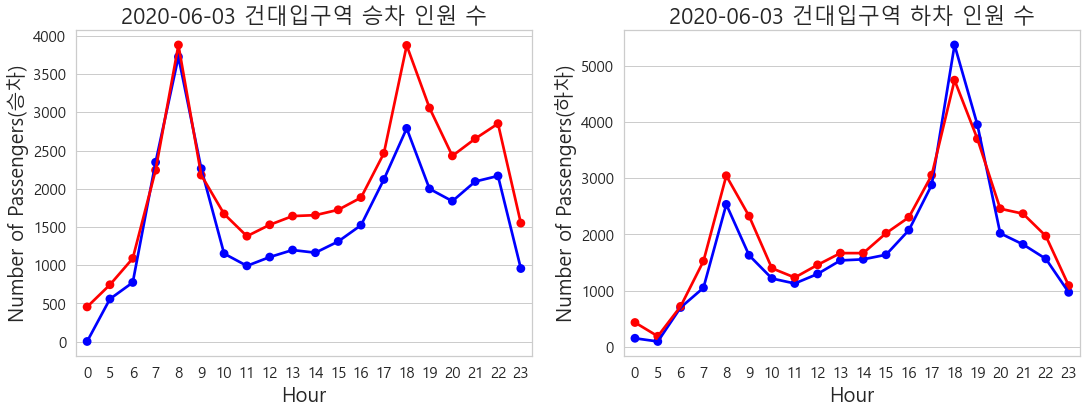

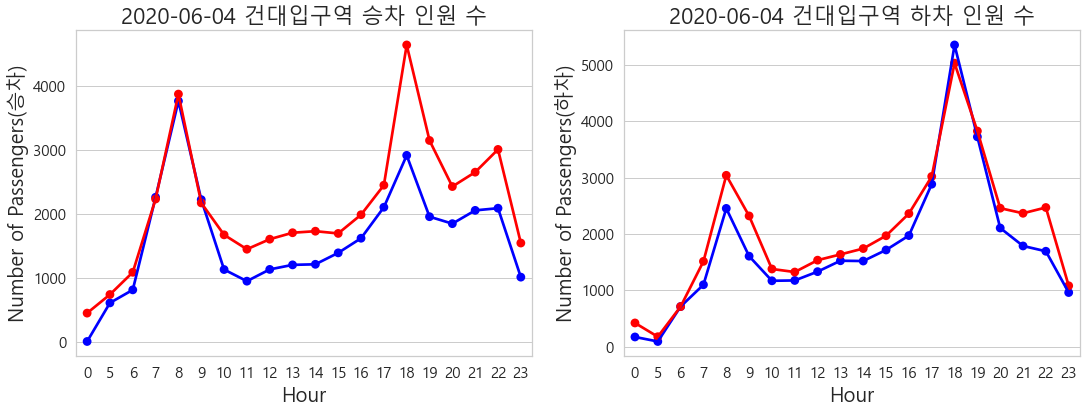

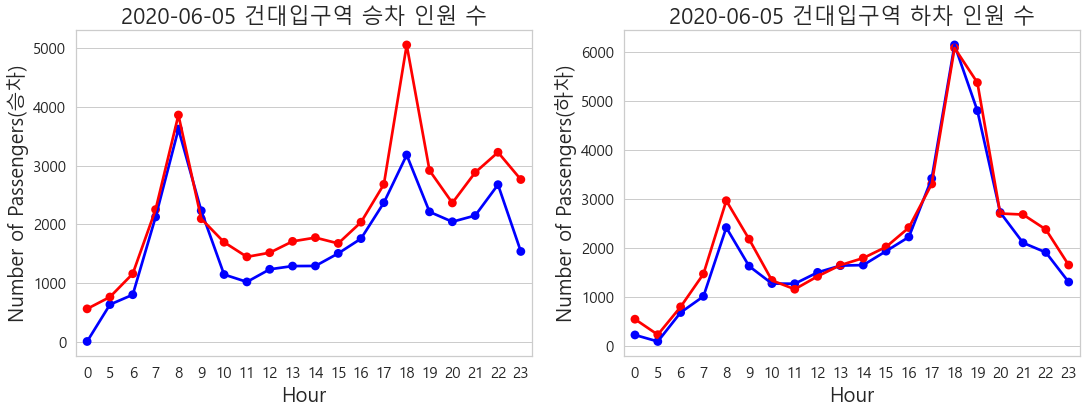

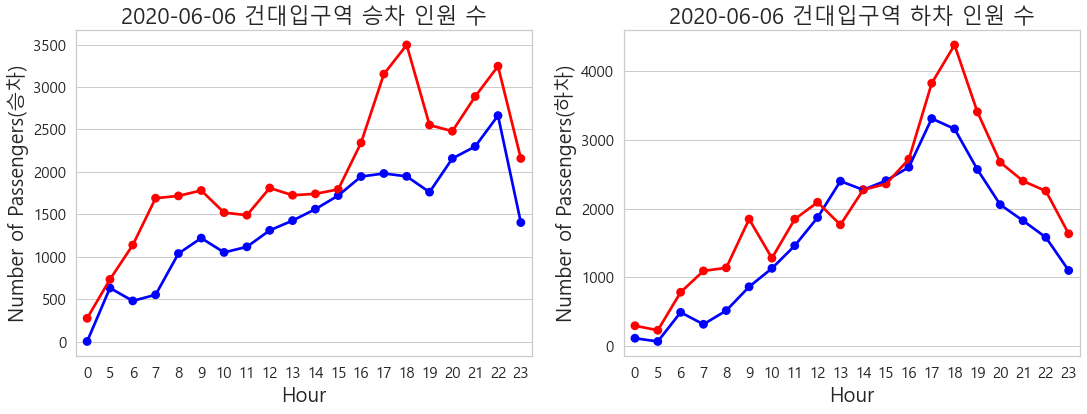

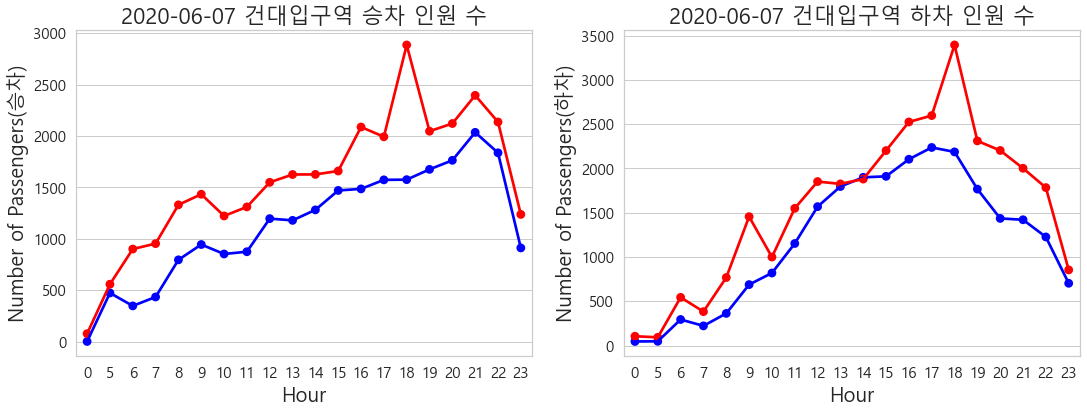

In [19]:
for day in tqdm(day_list):
    draw_pointplot(df_konkuk, day, '건대입구')

## 잠실(송파구청)역

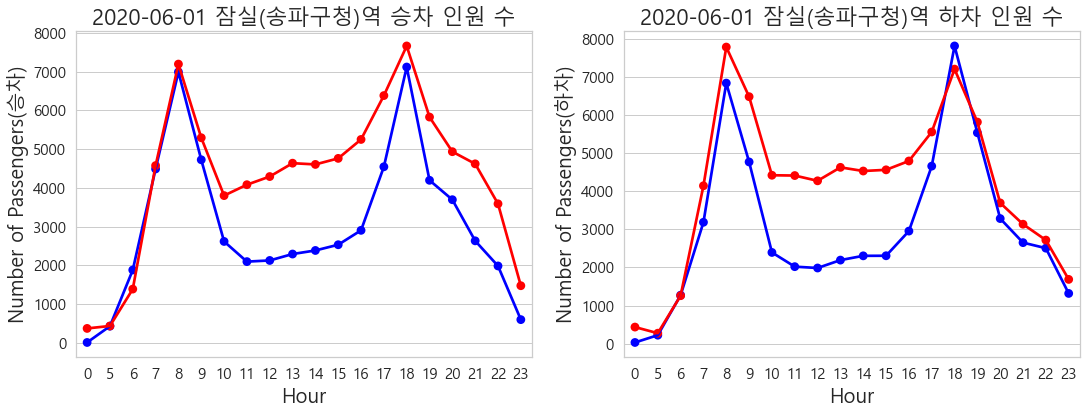

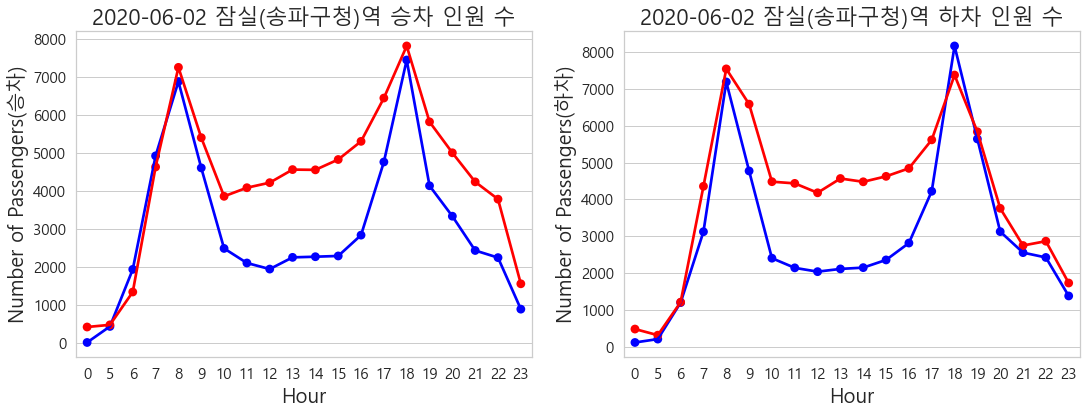

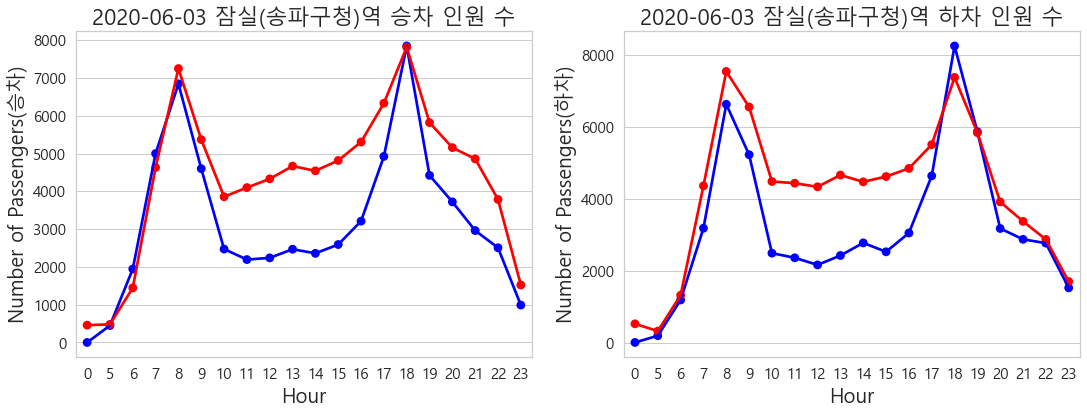

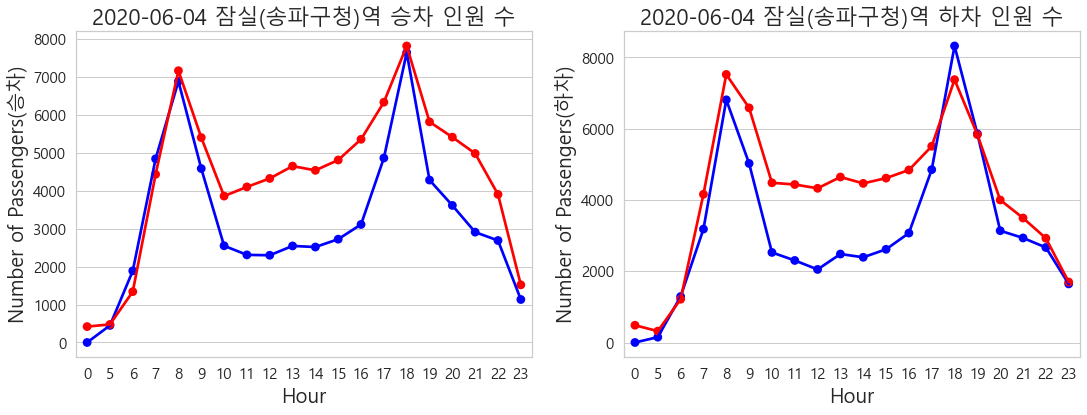

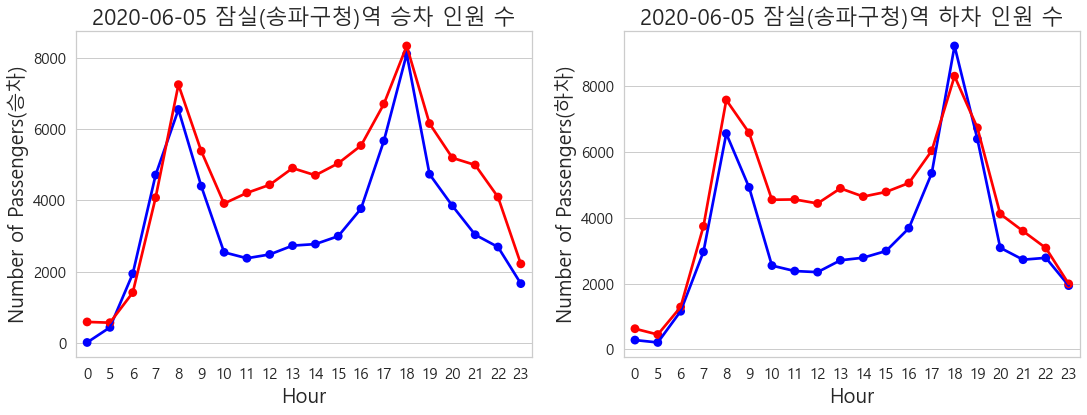

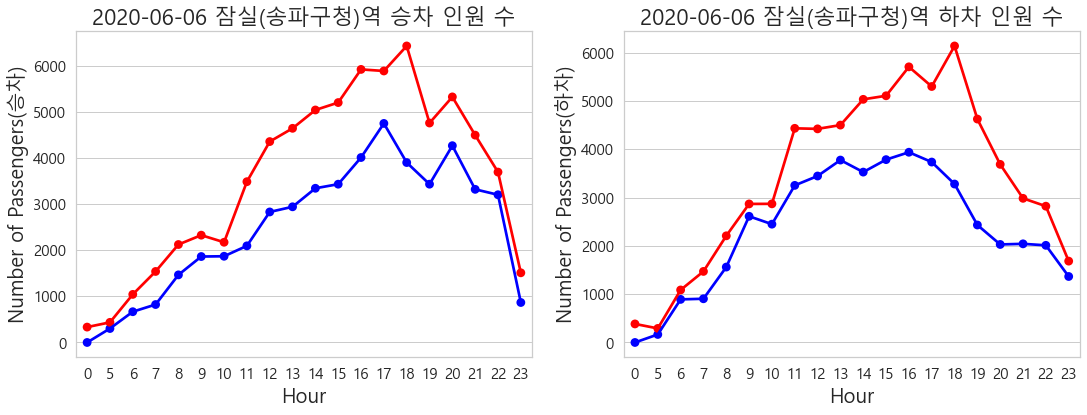

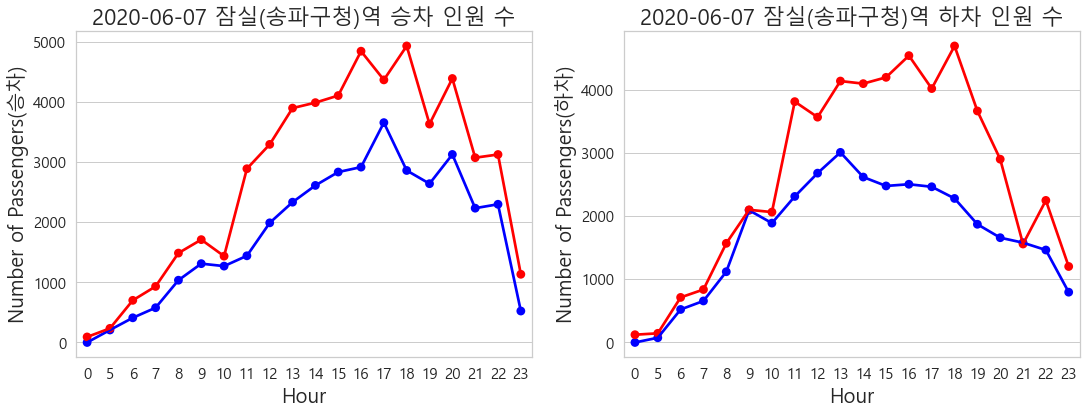

In [20]:
for day in tqdm(day_list):
    draw_pointplot(df_jamsil, day, '잠실(송파구청)')

## 강남역

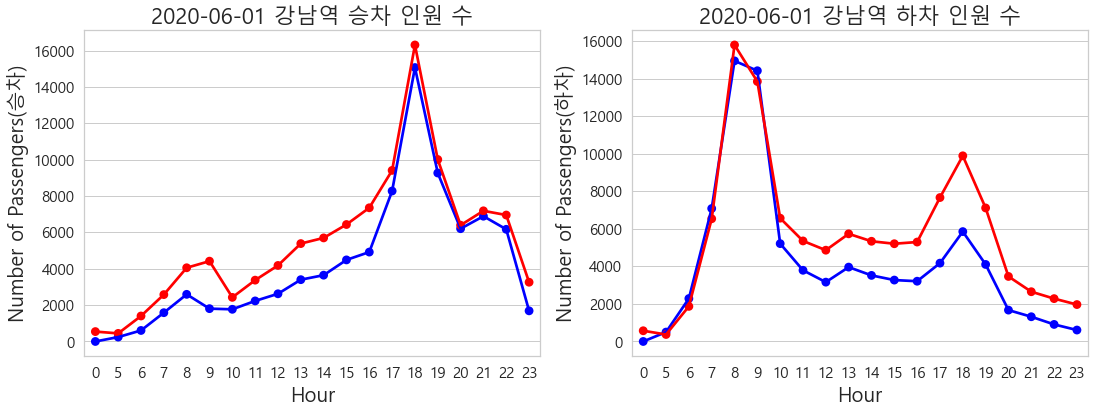

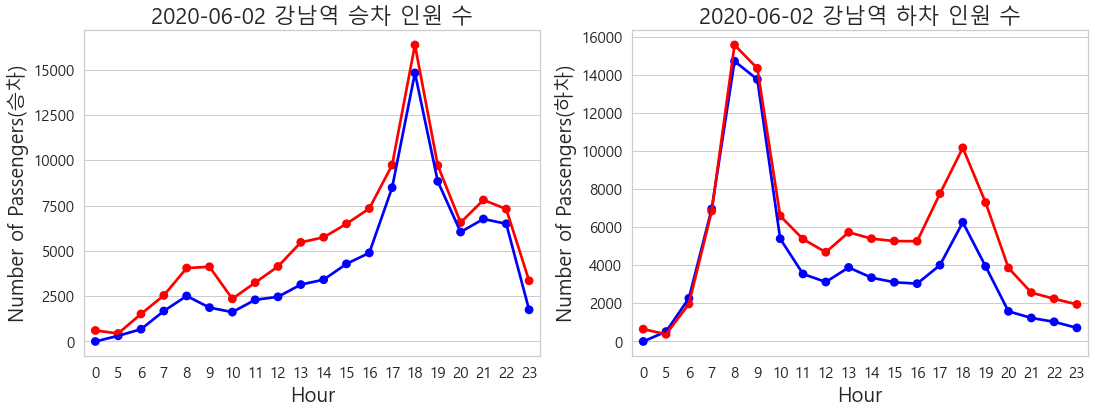

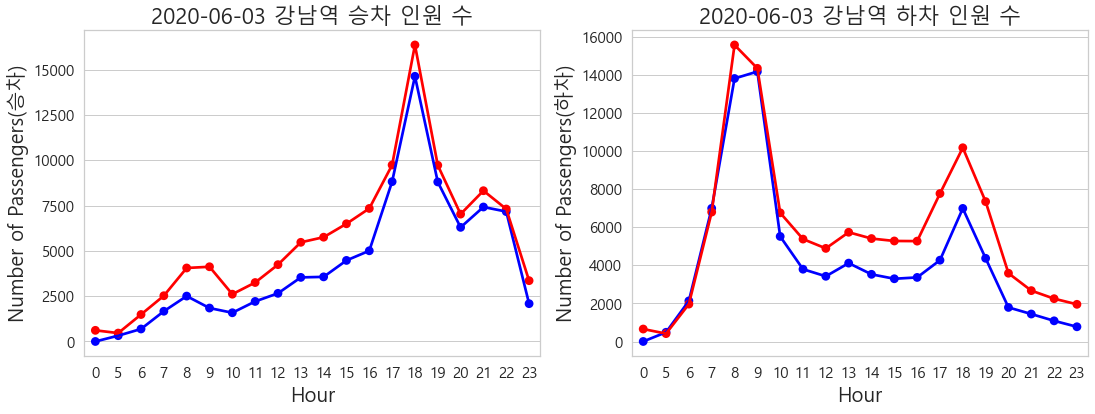

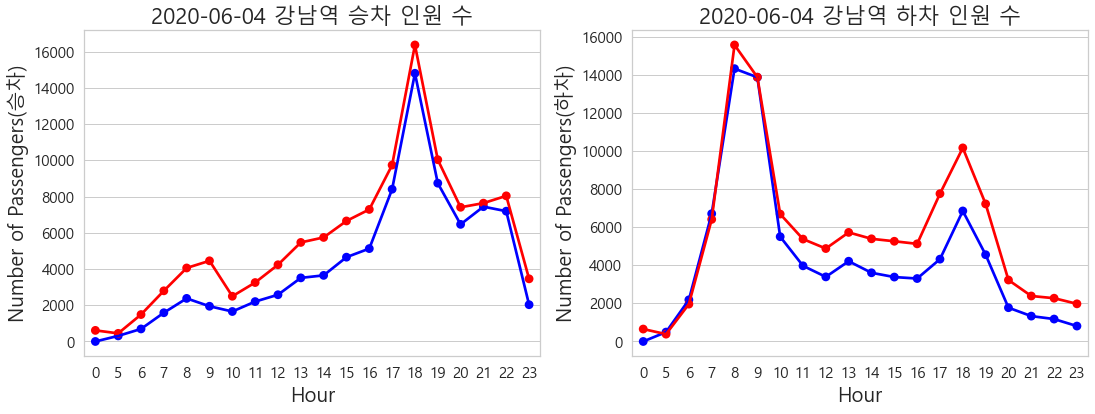

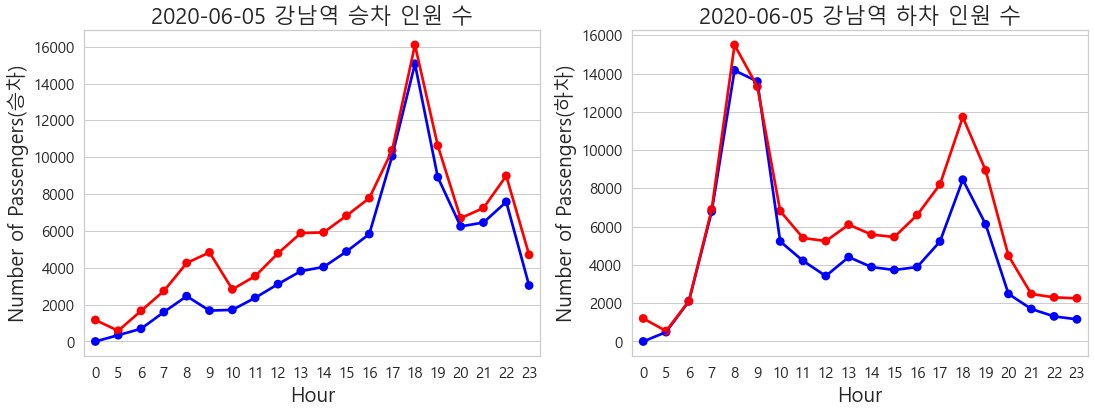

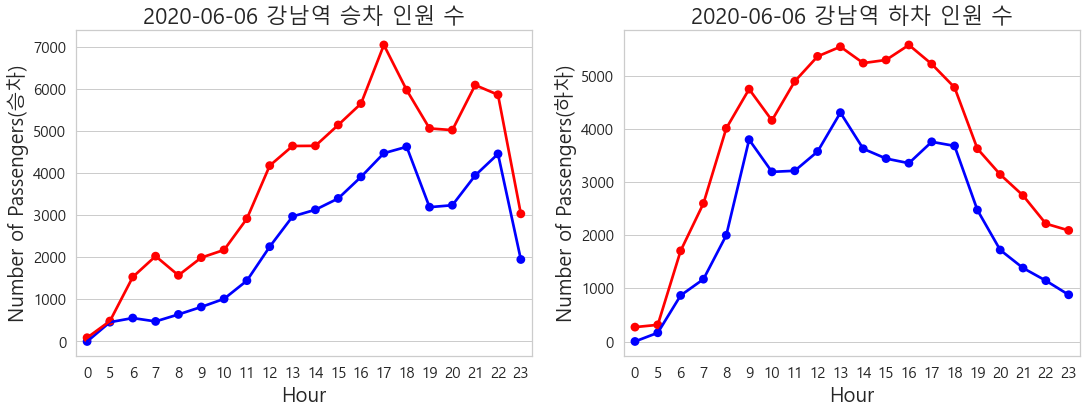

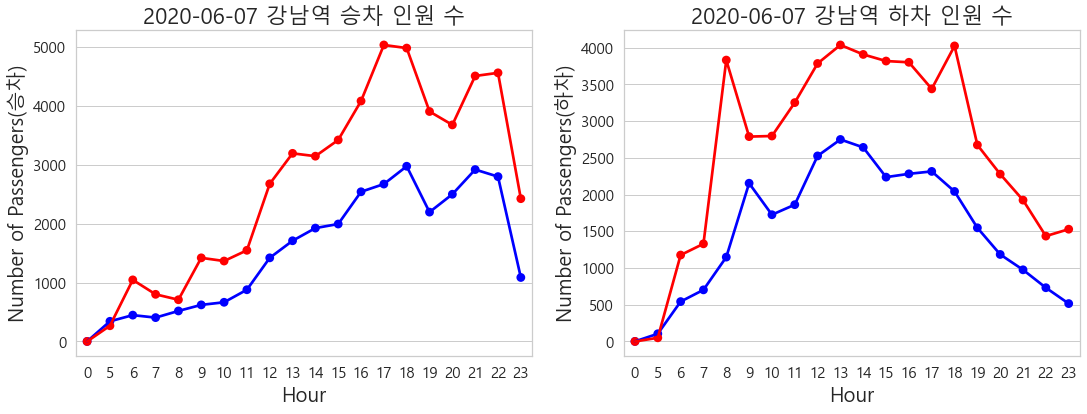

In [21]:
for day in tqdm(day_list):
    draw_pointplot(df_gangnam, day, '강남')

- 예측 결과를 시각화해서 살펴보면, "평일"에 대한 승/하차 인원 수는 어느 정도 비슷한 패턴으로 예측을 했음을 알 수 있다.
- 반면에 "주말"에 대한 승/하차 인원 수는 비슷한 패턴으로 예측을 하긴 했으나, "평일"에 비해 예측력이 좋지 않음을 확인할 수 있다.